<a href="https://colab.research.google.com/github/bhaskarfx/nlp/blob/main/NLP_Embedding_gutenberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Word Embedding Techniques In NLP**

*by [Dr. Bhaskar Mondal](https://sites.google.com/view/bmondal/bhaskarmondal?authuser=3)*

**Subscribe to my YouTube Channel:** https://www.youtube.com/c/iqpop 

--------------------------------------------
Two kind of word embeddings:
1. Static Word Embedding: Traditional methods such as Skip-Gram and Continuous Bag-of-Words learn static embedding by training lookup tables that translate words into dense vector. Static embedding are directly useful for solving lexical semantics task.
2. Contextual Word Embedding: Contextualised words embedding aim at capturing word semantics in different contexts to address the issue of polysemous and the context-dependent nature of words. 

**Word embeddings** are a type of word representation that allows words with similar meaning to have a similar representation.

Machine Learning and Deep Learning algorithms cannot process strings or plain text in their raw form, they require numbers as inputs in general terms.



*   individual words are represented as real-valued vectors in a predefined vector space.
*   Each word is mapped to one vector and the vector values (tens or hundreds of dimensions) are learned in a way that resembles a neural network

Some Word embeddings Techniques are:


*   Word2Vec
*   GloVe (Global Vectors for Word Representation)
*   ELMo


Applications:

*   determining the sentiment of a customer review. 
*   predicting what word comes next in an incomplete sentence 
*   Using lyrics of songs you liked to recommend songs 
*   Using a web translation service, like Google Translate, to convert webpage articles seamlessly to a different language.

require some form of understanding words in a given text. 

**Word2Vec — Capturing Semantic Information**


*   Developed by Tomas Mikolov and other researchers at Google in 2013
*   Word2Vec finds similarities among words by using the cosine similarity
*   If the cosine angle is 1, that means words are overlapping. If the cosine angle is 90, that means words are independent or hold no contextual similarity.

**Word2Vec offers two neural network-based variants:**

*   *Continuous Bag of Words (CBOW)*: the neural network model takes various words as input and predicts the target word that is closely related to the context of the input words.
  *   quick and finds better numerical representations for frequent words
*   *Skip-gram*: the Skip-gram architecture takes one word as input and predicts its closely related context words.
  *   works well with small amount of the training data, can efficiently represent rare words.

Word2Vec models are good at capturing semantic relationships among words. For example, the relationship between a country and its capital, like Paris is the capital of France and Berlin is the capital of Germany. 


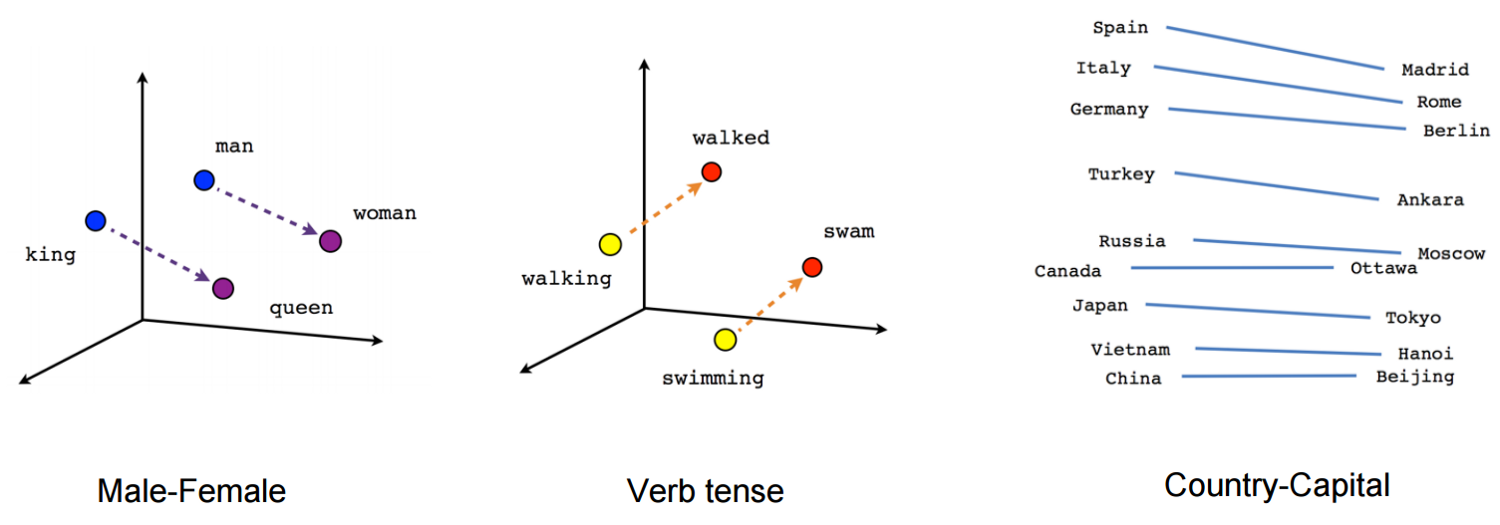

Source: https://www.tensorflow.org/tutorials/representation/word2vec

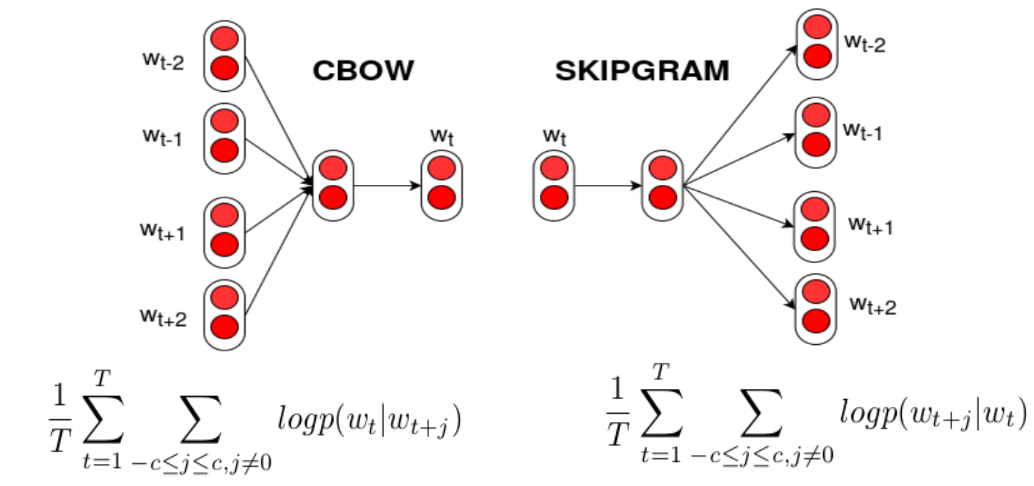

Say we have two sentences

*   s1: Have a good day 
*   s2: Have a great day

vocabulary (V), V = {Have, a, good, great, day}; size of V (=5)

OneHot Encoding 
*   Have = [1,0,0,0,0]'; 
*   a=[0,1,0,0,0]' ; 
*   good=[0,0,1,0,0]' ; 
*   great=[0,0,0,1,0]' ; 
*   day=[0,0,0,0,1]' (' represents transpose)

If we try to visualize these encodings, we can think of a 5 dimensional space

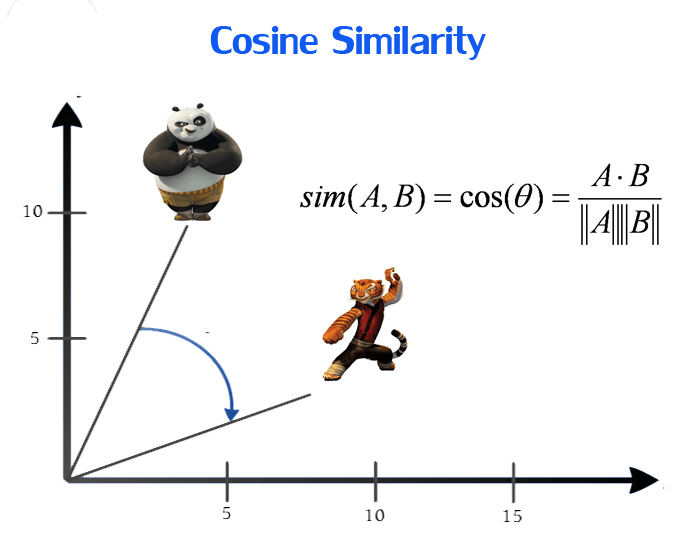

https://jalammar.github.io/illustrated-word2vec/

**Pre-trained Word Embedding Models:**

People generally use pre-trained models for word embeddings. Few of them are:

SpaCy
fastText
Flair etc.

**Features of Gensim Library**


*   fastText: This feature uses a neural network for word embedding purposes, which is a library for learning word embedding and text classification as well. 
*   word2vec: Word2vec is used to create word embedding which is a also group of shallow and two-layer neural network models. The models are generally trained to reconstruct semantic contexts of words.
*   doc2vec algorithms: Doc2Vec model is just opposite to the Word2Vec model that is used to develop a vectorized representation of a group of words taken collectively as a single unit. It does not give a simple average of the words in the sentence.
*   Latent semantic analysis (LSA, LSI, SVD): It is also a technique in NLP (Natural Language Processing) that allows us to analyze relationships between a set of documents and their terms. It is done by constructing a set of concepts related to the documents and terms.
*   Latent Dirichlet Allocation (LDA): It’s a technique in NLP(Natural Language Processing) that allows sets of observations to be explained by unobserved “groups”. These unobserved groups explain to us why some part is similar of the data. So it is a generative statistical model.
*   TF-IDF: Term frequency-inverse document frequency is a numeric statistic in information renewal, throwback how important a word is to a document in a corpus.


**word2vec implemetation**

In [1]:
#import the libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np

In [2]:
import nltk.data
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from urllib import request
url_alice = 'https://www.gutenberg.org/files/11/11-0.txt'
# url_moby = 'https://www.gutenberg.org/files/2701/2701-0.txt'
# opening the txt files
response_alice = request.urlopen(url_alice)
# reading the files into raw variables as strings
raw_alice = response_alice.read().decode('utf8')
# Split the raw files into lists of sentences
tokenized_alice = sent_tokenize(raw_alice)
print(len(tokenized_alice))
# remove the contents
tokenized_alice = tokenized_alice[14:]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
1102


In [29]:
len(raw_alice)

167808

In [4]:
# split into words
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')

# Replaces escape character with space
f = raw_alice.replace("\n", " ")


In [5]:
def tokenization(data):
  # iterate through each sentence in the file
  tokens=[]
  for i in sent_tokenize(f):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
      t=j.lower()
      temp.append(t)
    tokens.append(temp)
  return tokens

In [6]:
tokens=tokenization(f)
print(tokens[:100])

[['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'alice', '’', 's', 'adventures', 'in', 'wonderland', ',', 'by', 'lewis', 'carroll', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.'], ['you', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.org', '.'], ['if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', ',', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', '.'], ['title', ':', 'alice', '’', 's', 'adventures', 'in', 'wonderland', 'author', ':', 'lewis', 'carroll', 'release', 'date', ':', 'january', ',', '1991

In [7]:
#Remove Stop Words
# filter out stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def remove_stopwords(data):
  stripped=[]
  for sen in data:
    temp=[]
    for word in sen:
      if word not in stop_words:
        temp.append(word)
    stripped.append(temp)
  return stripped

In [9]:
tokens=remove_stopwords(tokens)
print(tokens[:100])

[['\ufeffthe', 'project', 'gutenberg', 'ebook', 'alice', '’', 'adventures', 'wonderland', ',', 'lewis', 'carroll', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', '.'], ['may', 'copy', ',', 'give', 'away', 're-use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www.gutenberg.org', '.'], ['located', 'united', 'states', ',', 'check', 'laws', 'country', 'located', 'using', 'ebook', '.'], ['title', ':', 'alice', '’', 'adventures', 'wonderland', 'author', ':', 'lewis', 'carroll', 'release', 'date', ':', 'january', ',', '1991', '[', 'ebook', '#', '11', ']', '[', 'recently', 'updated', ':', 'october', '12', ',', '2020', ']', 'language', ':', 'english', 'character', 'set', 'encoding', ':', 'utf-8', 'produced', ':', 'arthur', 'dibianca', 'david', 'widger', '***', 'start', 'project', 'gutenberg', 'ebook', 'alice', '’', 'adventures', 'wonderland', '***', '[', 'illustration', ']', 'alice', '’'

In [10]:
#for string operations
import string         
#remove punctuations
def remove_punc(data):
  stripped=[]
  for sen in data:
    temp=[]
    for word in sen:
      if word not in string.punctuation:
        temp.append(word)
    stripped.append(temp)
  return stripped

In [11]:
tokens=remove_punc(tokens)
print(tokens[:100])

[['\ufeffthe', 'project', 'gutenberg', 'ebook', 'alice', '’', 'adventures', 'wonderland', 'lewis', 'carroll', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever'], ['may', 'copy', 'give', 'away', 're-use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www.gutenberg.org'], ['located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook'], ['title', 'alice', '’', 'adventures', 'wonderland', 'author', 'lewis', 'carroll', 'release', 'date', 'january', '1991', 'ebook', '11', 'recently', 'updated', 'october', '12', '2020', 'language', 'english', 'character', 'set', 'encoding', 'utf-8', 'produced', 'arthur', 'dibianca', 'david', 'widger', '***', 'start', 'project', 'gutenberg', 'ebook', 'alice', '’', 'adventures', 'wonderland', '***', 'illustration', 'alice', '’', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', '3.0', 'contents', 'chap

In [12]:
#remove punctuations
def remove_nonalpha(data):
  stripped=[]
  for sen in data:
    temp=[]
    for word in sen:
      if word.isalpha():
        temp.append(word)
    stripped.append(temp)
  return stripped

In [13]:

tokens=remove_nonalpha(tokens)
print(tokens[:100])

[['project', 'gutenberg', 'ebook', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever'], ['may', 'copy', 'give', 'away', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online'], ['located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook'], ['title', 'alice', 'adventures', 'wonderland', 'author', 'lewis', 'carroll', 'release', 'date', 'january', 'ebook', 'recently', 'updated', 'october', 'language', 'english', 'character', 'set', 'encoding', 'produced', 'arthur', 'dibianca', 'david', 'widger', 'start', 'project', 'gutenberg', 'ebook', 'alice', 'adventures', 'wonderland', 'illustration', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter'], ['chapter', 'ii'], ['pool', 'tears', 'chapter', 'iii'], ['long', 'tale', 'chapter', 'iv'], ['rabbit', 'sends', 'lit

In [14]:
model = Word2Vec(tokens, min_count=1,size=100)
# model = Word2Vec(word, size=150, window=10, min_count=2, sg=1, workers=10)
# model.build_vocab(documents)

*   *list_of_lists*: This is the same list of lists that we generated during the preprocessing phase.
*   *min_count*: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
*   *size*: The size of the embedding vector for each word and the default is 100.
*   *workers*: Number of processors (parallelisation) during training and the default workers is 3.
*   *window*: The maximum distance between a target word and words around the target word. The default window is 5.
*   *sg*: Selects training algorithm: 1 for Skip-Gram; 0 for CBOW (Continuous Bag of Words).
*  *iter*: Number of epochs training over corpus

In [15]:
print(model)

Word2Vec(vocab=2731, size=100, alpha=0.025)


alpha: learning rate

Now the vocabulary is created and the Word2Vec model is specified.

# Exploring the trained Word2Vec model 

The learned vocabulary of tokens (words) is stored in "model.wv.vocab".

In [16]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

project
gutenberg
ebook
alice
adventures
wonderland
lewis
carroll
use
anyone


In [26]:
words = list(model.wv.vocab)
print(words[:10])

['project', 'gutenberg', 'ebook', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'use', 'anyone']


We can see that the length of vaabulary

In [18]:
len(word_vectors.vocab)

2731

The embedded vectors for a specific token are stored in a KeyedVectors instance in "model.wv". We can see that the length of a word vector is equal to 100 as we defined by the parameter "size":

In [19]:
vector = model.wv["alice"]  # numpy vector of a word
len(vector)

100

In [27]:
# print(model['drink'])
print(model['alice'])

[ 1.3625787e-02 -4.4814982e-02  3.0762265e-02  1.8370731e-02
 -4.3400042e-04  8.6128470e-03  1.8845230e-02  2.5501855e-02
  5.1089205e-02 -1.7255809e-02  2.7682545e-02  5.7087471e-03
  9.9314846e-02  6.4419866e-02 -6.8214145e-03  6.8995748e-03
  2.8740976e-03 -1.1570617e-02  1.9159427e-02 -6.1144926e-02
  3.0396530e-02  2.3030001e-03  2.7340502e-02 -5.1002923e-02
  4.9540745e-03 -5.0351132e-02 -2.0285262e-02 -2.1461088e-02
  3.9784163e-03  1.2710140e-02 -5.8229905e-02  1.8422920e-02
 -1.7544569e-02  7.9919007e-03 -4.2321049e-03 -2.8164223e-02
  2.9636374e-02  4.1451849e-02  1.1237136e-02  3.2150004e-02
  3.8470481e-02 -2.8659809e-02 -5.0757468e-02  2.7739856e-02
 -1.4156163e-03  5.8690988e-02  3.6617909e-03  5.8282008e-03
 -9.5954044e-03  7.4369381e-03  2.1827428e-02 -1.5525209e-02
 -1.7565567e-02  1.0101220e-02  3.6054209e-02  5.8377679e-03
 -1.2346796e-02  3.8038346e-03 -6.7721546e-02  1.5294368e-02
  1.4591593e-02  2.2231745e-02  1.2110241e-03 -8.6126691e-03
  3.6390128e-03 -2.32008

# Playing with the trained Word2Vec model

1.  Given a word, find most similar words
2.  Given words A and B, find other words that are similar to A and opposite to B
3.  Given a sequence of words, find an odd word

In [21]:
w1 = "alice"
model.wv.most_similar(positive=w1, topn=5)

[('said', 0.9871478080749512),
 ('little', 0.9844870567321777),
 ('time', 0.9836907386779785),
 ('went', 0.9823682308197021),
 ('one', 0.9819306135177612)]

In [22]:
w1 = ["alice","said"]
w2 = ["wonderland"]
model.wv.most_similar (positive=w1,negative=w2,topn=2)

[('queen', 0.8685773611068726), ('mouse', 0.8668458461761475)]

In [23]:
#odd thing out
model.wv.doesnt_match(["alice","went","queen"])

'queen'

In [24]:
import gensim
from gensim.models import Word2Vec

# # Create CBOW model
modelCBOW = gensim.models.Word2Vec(tokens, min_count = 1,
							size = 100, window = 5)

# Print results
print("Cosine similarity between 'alice' " +
			"and 'wonderland' - CBOW : ",
	modelCBOW.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
				"and 'machines' - CBOW : ",
	modelCBOW.similarity('alice', 'machines'))

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.50794905
Cosine similarity between 'alice' and 'machines' - CBOW :  0.061144695


In [25]:
# Create Skip Gram model
modelSkipGram = gensim.models.Word2Vec(tokens, min_count = 1, size = 100,
											window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " +
		"and 'wonderland' - Skip Gram : ",
	modelSkipGram.similarity('alice', 'wonderland'))
	
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ",
	modelSkipGram.similarity('alice', 'machines'))


Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.9986483
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.991056


https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/

https://www.analyticssteps.com/blogs/word-embedding-nlp-python-code



# **GloVe — Global Vectors for Word Representation**

 Developed by Jeffery Pennington and other researchers at Stanford, GloVe extends the work of Word2Vec to capture global contextual information in a text corpus by calculating a global word-word co-occurrence matrix.



*   Word2Vec only captures the local context of words. 
*   GloVe combines the advantages of two-word vector learning methods: matrix factorization like latent semantic analysis (LSA) and local context window method like Skip-gram.



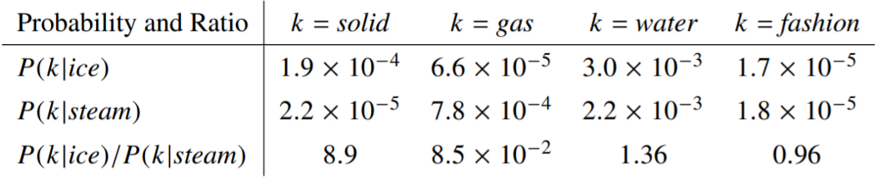


GloVe: Global Vectors for Word Representation — Jeffrey Pennington

https://colab.research.google.com/drive/1HI9kqc_ZSp7ioOWJtU___4H9b1ibvsXa?authuser=1

# **ELMo**
Embedding Layer : ELMo (Embedding from Language Models): ELMo is a deep contextualised word representation that models both ,
1. complex characteristics of word use (e.g., syntax and semantics), and
2. how these uses vary across linguistic contexts (i.e., to model polysemy). Example: Although ‘Apple’ term is common, but ELMo will give different embeddings for both (fruit and organisation) due to contextual logic.


Before we jump into ELMo, consider this example (*The meaning of the word "DATE"*):

*   Her favorite fruit to eat is a date.
*   Joe took Alexandria out on a date.

ELMo representations are:
*   Contextual
*   Character based

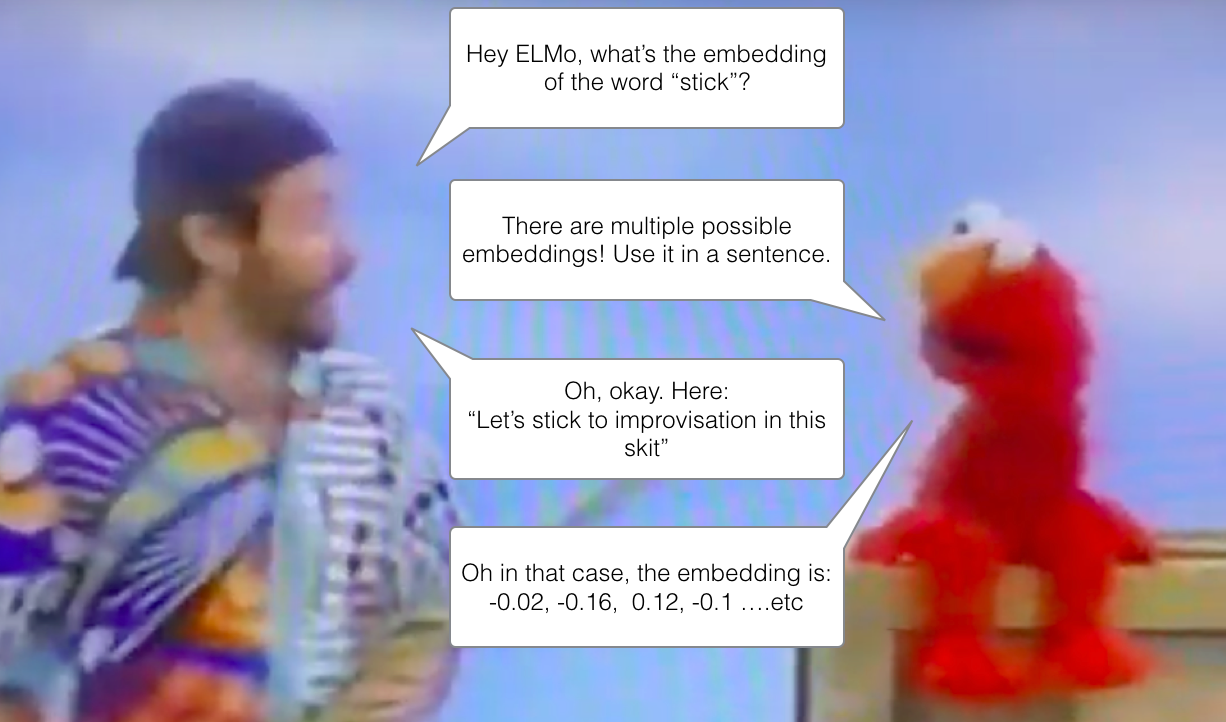

Source: The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning) by Jay Allamar